In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


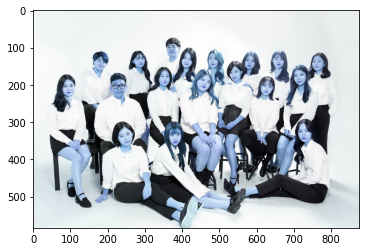

In [18]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/many_people.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

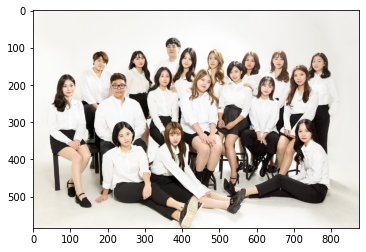

In [19]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [20]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [21]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(693, 162) (729, 198)], [(77, 194) (113, 230)], [(741, 126) (777, 162)], [(705, 314) (741, 350)], [(361, 326) (397, 362)], [(441, 178) (477, 214)], [(333, 166) (369, 202)], [(229, 326) (265, 362)], [(521, 154) (557, 190)], [(165, 126) (201, 162)], [(208, 190) (252, 233)], [(609, 194) (645, 230)], [(561, 126) (597, 162)], [(641, 122) (677, 158)], [(465, 118) (501, 154)], [(393, 122) (429, 158)], [(353, 90) (389, 126)], [(269, 118) (305, 154)]]


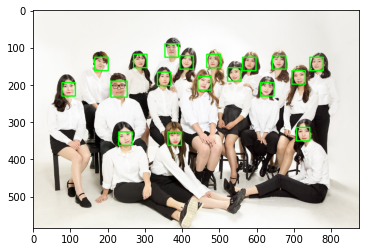

In [22]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [24]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


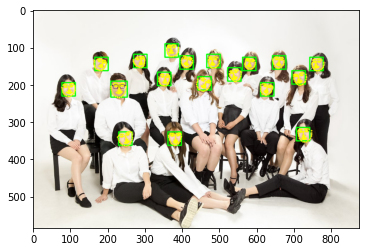

In [25]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [38]:
x = []
y = []
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x.append(landmark[30][0])    # x = landmark[30][0]
    y.append(landmark[30][1] - dlib_rect.width()//2)  # y =land~~
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(w,h) : (%d,%d)'%(w,h))

(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (45,45)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)
(w,h) : (37,37)


In [39]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(37, 37, 3)


In [40]:
refined_x = []
refined_y = []
for i in range(len(x)):
    refined_x.append(x[i] - w//2)  # left
    refined_y.append(y[i])     # top

In [41]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]]
    img_show[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]] =     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

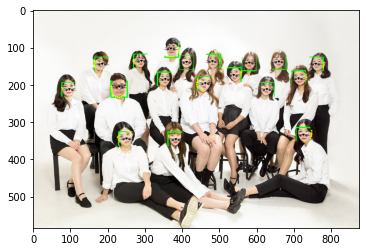

In [42]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

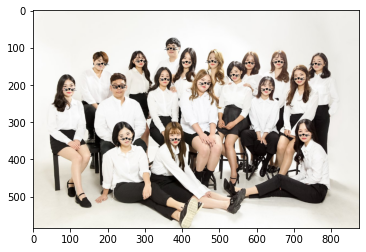

In [45]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]]
    img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()